### Machine Learning Introductory Session - NELIREF 28/06/2024

#### Topics include:
##### 1. Reading files
##### 2. Data Preprocessing
##### 3. Model Building
    - 3.1 Linear Regression
    - 3.2 Logistic Regression
    - 3.3 Decision Tree
    - 3.4 Random Forest
    - 3.5 XGBoost
    - 3.6 Clustering
##### 4. Model Evaluation
##### 5. Prediction

############################-------------------------------------------------------###################################------------------------------------------------------------

In [4]:
pip install ucimlrepo

In [5]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import ucimlrepo

##**Datasets**

**Dataset 1: Wholesale Customers**

wholesale_customers = "https://archive.ics.uci.edu/ml/datasets/Wholesale+customers"

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wholesale_customers = fetch_ucirepo(id=292)

# data (as pandas dataframes)
X = wholesale_customers.data.features
y = wholesale_customers.data.targets

In [8]:
newy = y.assign(new_col = np.where((y['Region'] == 1)|(y['Region'] == 2), 1, 3)).filter(['new_col'])
updatedy = newy.assign(new_col = np.where((newy['new_col'] == 1), 1, 0))
updatedy.value_counts()

new_col
0          316
1          124
Name: count, dtype: int64

**Dataset 2: California Housing prices**

In [164]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# Load dataset
#boston = load_boston()

# Convert to DataFrame
features = pd.DataFrame(housing.data, columns=housing.feature_names)
target = pd.DataFrame(housing.target, columns=['PRICE'])

In [165]:
target.head()

,PRICE
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


**Preprocessing**

In [198]:
target['sqrt'] = np.sqrt(target['PRICE'])

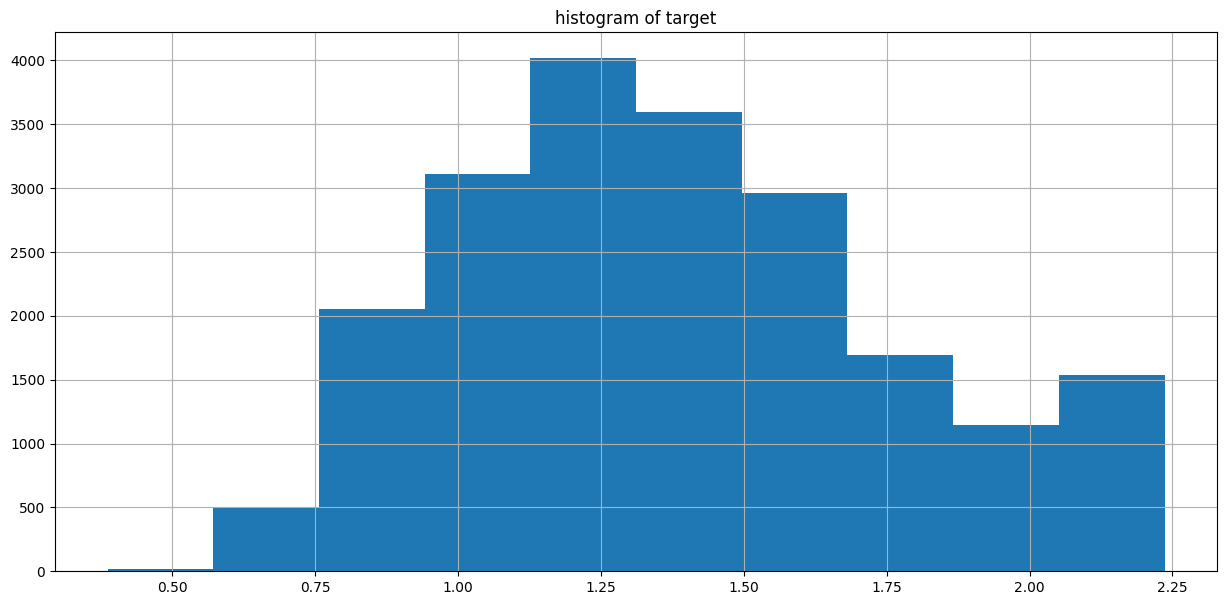

In [199]:
target['sqrt'].hist(figsize=(15, 7))
plt.title('histogram of target')
plt.show()

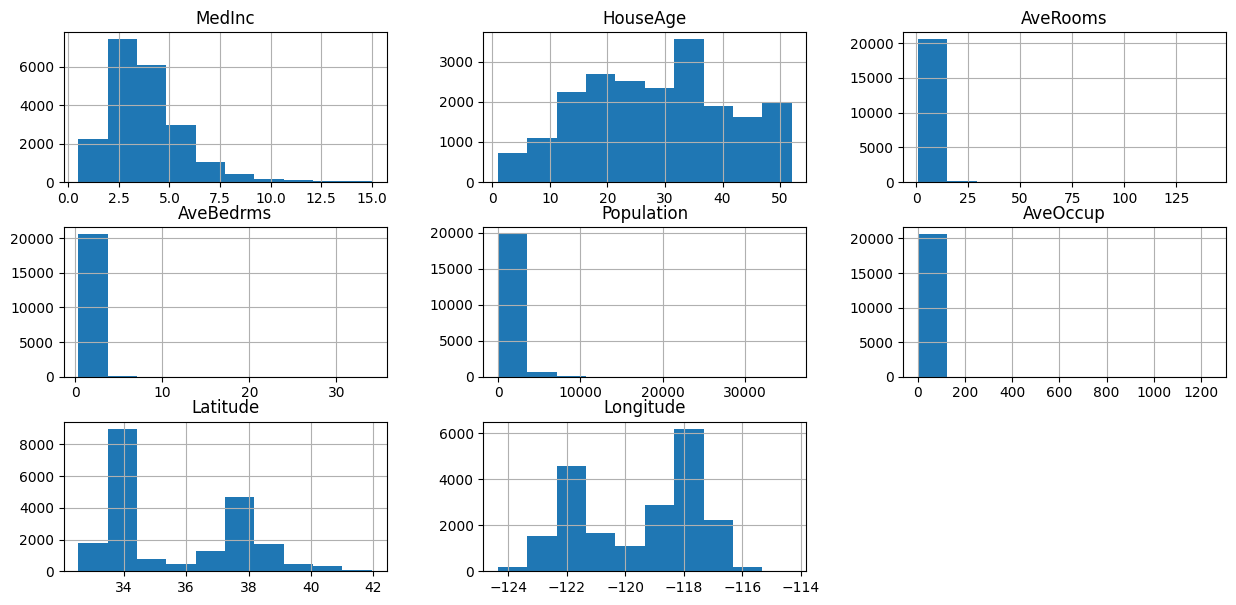

In [168]:
features.hist(figsize=(15, 7))
plt.title('histogram of features')
plt.show()

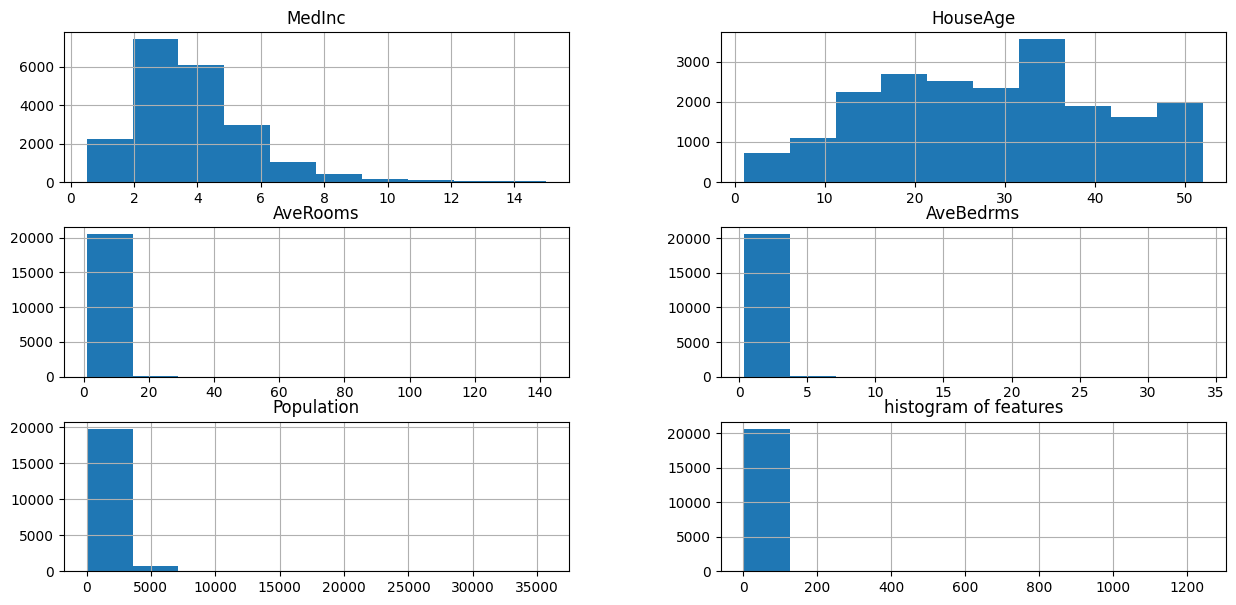

In [172]:
features_selected = features.drop(['Latitude', 'Longitude'], axis=1)
features_selected.hist(figsize=(15, 7))
plt.title('histogram of features')
plt.show()

In [173]:
features_selected.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333


In [174]:
## Standardize the data
scaler = StandardScaler()
X_reg_trn = scaler.fit_transform(features_selected)

In [175]:
X_reg_trn

array([[ 2.34476576,  0.98214266,  0.62855945, -0.15375759, -0.9744286 ,
        -0.04959654],
       [ 2.33223796, -0.60701891,  0.32704136, -0.26333577,  0.86143887,
        -0.09251223],
       [ 1.7826994 ,  1.85618152,  1.15562047, -0.04901636, -0.82077735,
        -0.02584253],
       ...,
       [-1.14259331, -0.92485123, -0.09031802,  0.04941393, -0.3695372 ,
        -0.0717345 ],
       [-1.05458292, -0.84539315, -0.04021111,  0.15877763, -0.60442933,
        -0.09122515],
       [-0.78012947, -1.00430931, -0.07044252,  0.1384028 , -0.03397701,
        -0.04368215]])

In [200]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reg_trn, target['sqrt'], test_size=0.2, random_state=42)


**Linear Regression Model**

In [201]:
# Initialize and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.07396945296371646
R^2 Score: 0.5038915627433899


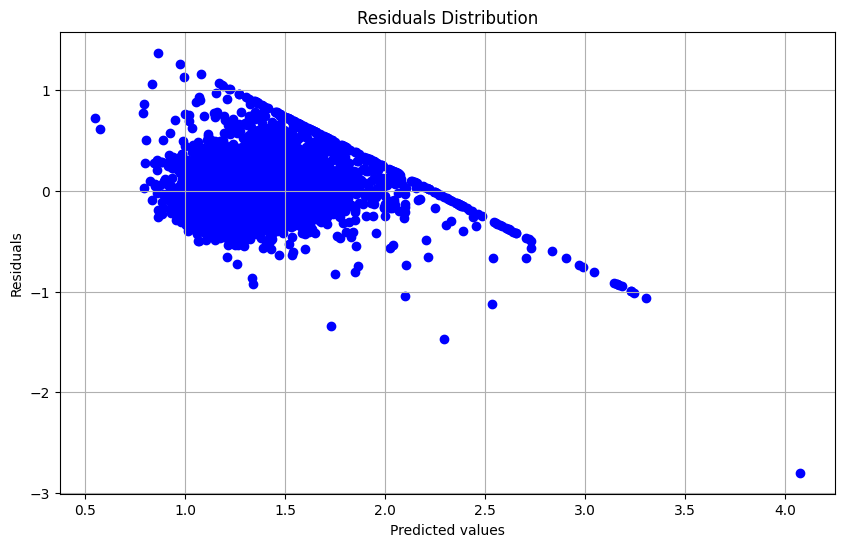

In [202]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals Distribution')
plt.grid(True)
plt.show()

**Logistic Regression Model**

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, updatedy['new_col'], test_size=0.3, random_state=42)

In [110]:
# Initialize and train the logistic regression model
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [111]:
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

In [112]:
# model evaluation
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[106   5]
 [ 21   0]]


In [113]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       111
           1       0.00      0.00      0.00        21

    accuracy                           0.80       132
   macro avg       0.42      0.48      0.45       132
weighted avg       0.70      0.80      0.75       132



In [ ]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)


Accuracy Score: 0.7954545454545454


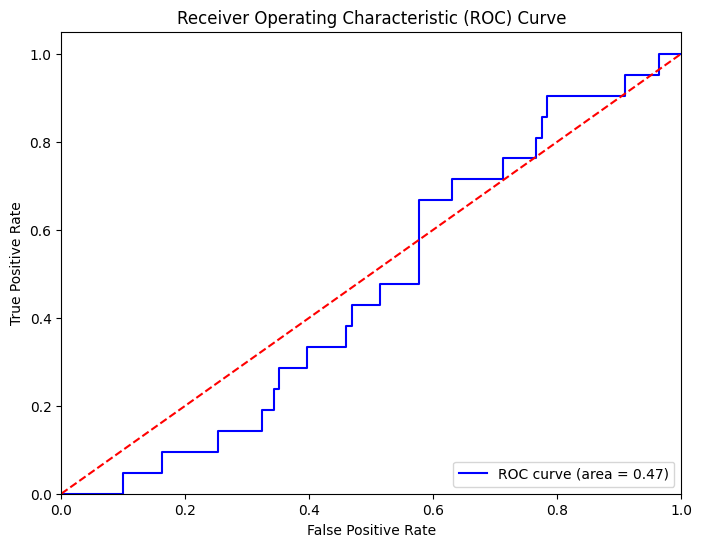

AUC Score: 0.4658944658944659


In [114]:
#ROC Curve and AUC Score
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print("AUC Score:", roc_auc)


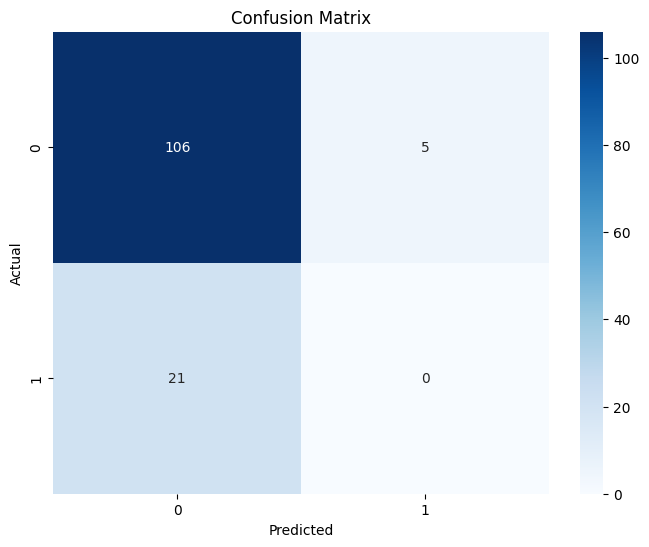

In [115]:
#Visualize the Results
#Confusion Matrix Heatmap
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Decision Tree Model**

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
#Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [15]:
#Evaluation metrics
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy:", accuracy_tree)

Accuracy: 0.5151515151515151


In [14]:
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix:\n", conf_matrix_tree)

Confusion Matrix:
 [[62 49]
 [15  6]]


**Random Forest Model**

In [16]:
# Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [17]:
#Evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.8106060606060606


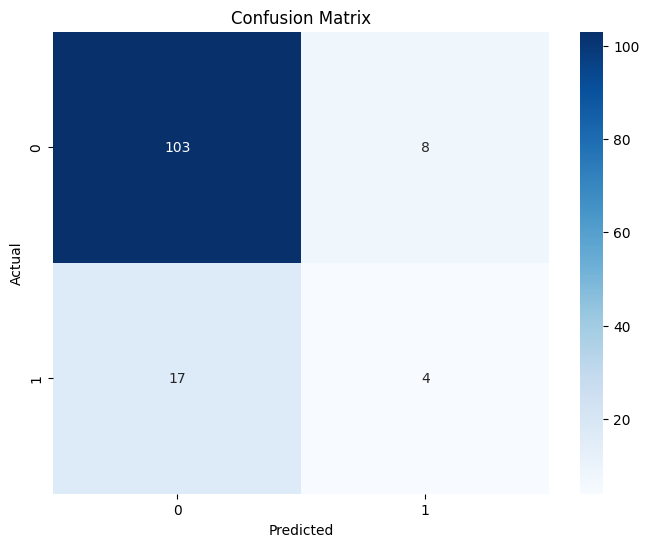

In [19]:
# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**XGBoost Model**

In [129]:
import xgboost as xgb

In [203]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_reg_trn, target['PRICE'], test_size=0.3, random_state=42)
dtrain = xgb.DMatrix(X_train_xgb, label=y_train_xgb)
dtest = xgb.DMatrix(X_test_xgb, label=y_test_xgb)

In [204]:
# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'max_depth': 4,
    'learning_rate': 0.1
}

# Train the model
model_xgb = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test set
y_pred_xgb = model_xgb.predict(dtest)

# Calculate residuals
residuals_xgb = y_test_xgb - y_pred_xgb

In [191]:
# Evaluate the model
mse_xgb = mean_squared_error(y_test_xgb, y_pred_xgb)
r2_xgb = r2_score(y_test_xgb, y_pred_xgb)

print("Mean Squared Error:", mse_xgb)
print("R^2 Score:", r2_xgb)

Mean Squared Error: 0.40865233737128603
R^2 Score: 0.6886553523671533


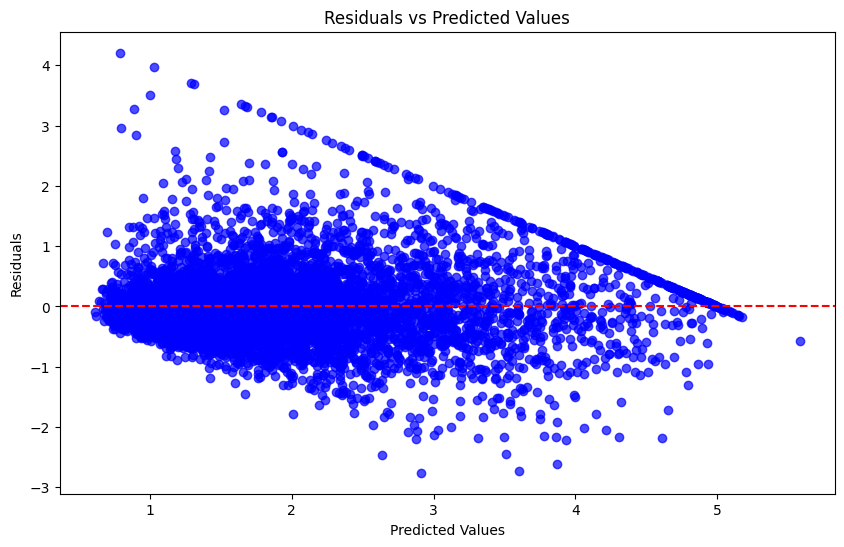

In [214]:
# Plotting residuals
residuals_xgb = y_test_xgb - y_pred_xgb

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb, residuals_xgb, color='blue', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

**Gradient Boosted Regression**

In [207]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=100, learning_rate=0.1)
gbrt.fit(X_train, y_train)

ypred_gbrt = gbrt.predict(X_test)

Mean Squared Error: 0.048143035568814746


In [208]:
## Evaluating gradient boost tree models
mse_gbrt = mean_squared_error(y_test, ypred_gbrt)
r2_gbrt = r2_score(y_test, ypred_gbrt)

print("Mean Squared Error:", mse_gbrt)
print("R^2 Score:", r2_gbrt)

Mean Squared Error: 0.048143035568814746
R^2 Score: 0.6771077088734216


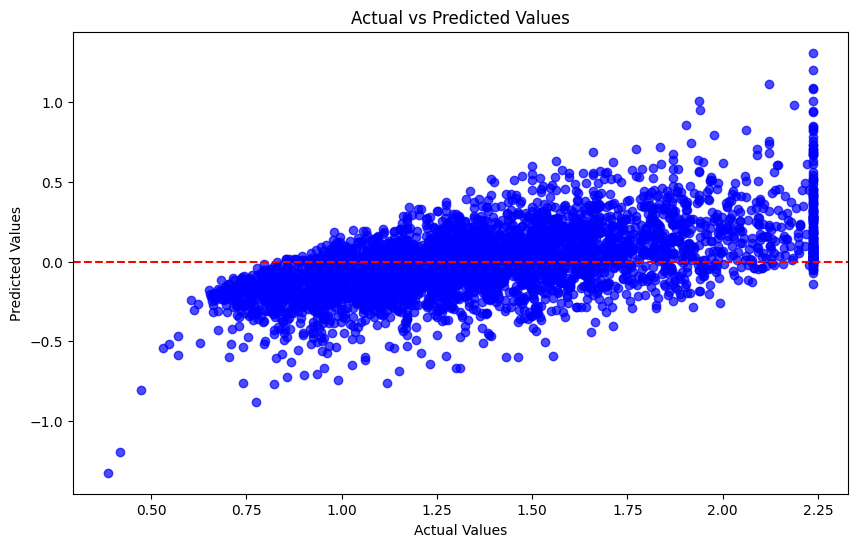

In [216]:
# Plotting Actual vs Predicted Values
residuals_gbrt = y_test - ypred_gbrt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_gbrt, color='blue', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

**Clustering Model**

**Dataset 3: Estimation of Obesity levels**

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
Xcl = pd.DataFrame(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features)
ycl = pd.DataFrame(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets )

# metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'title': 'Dataset f

In [250]:
Xcl.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


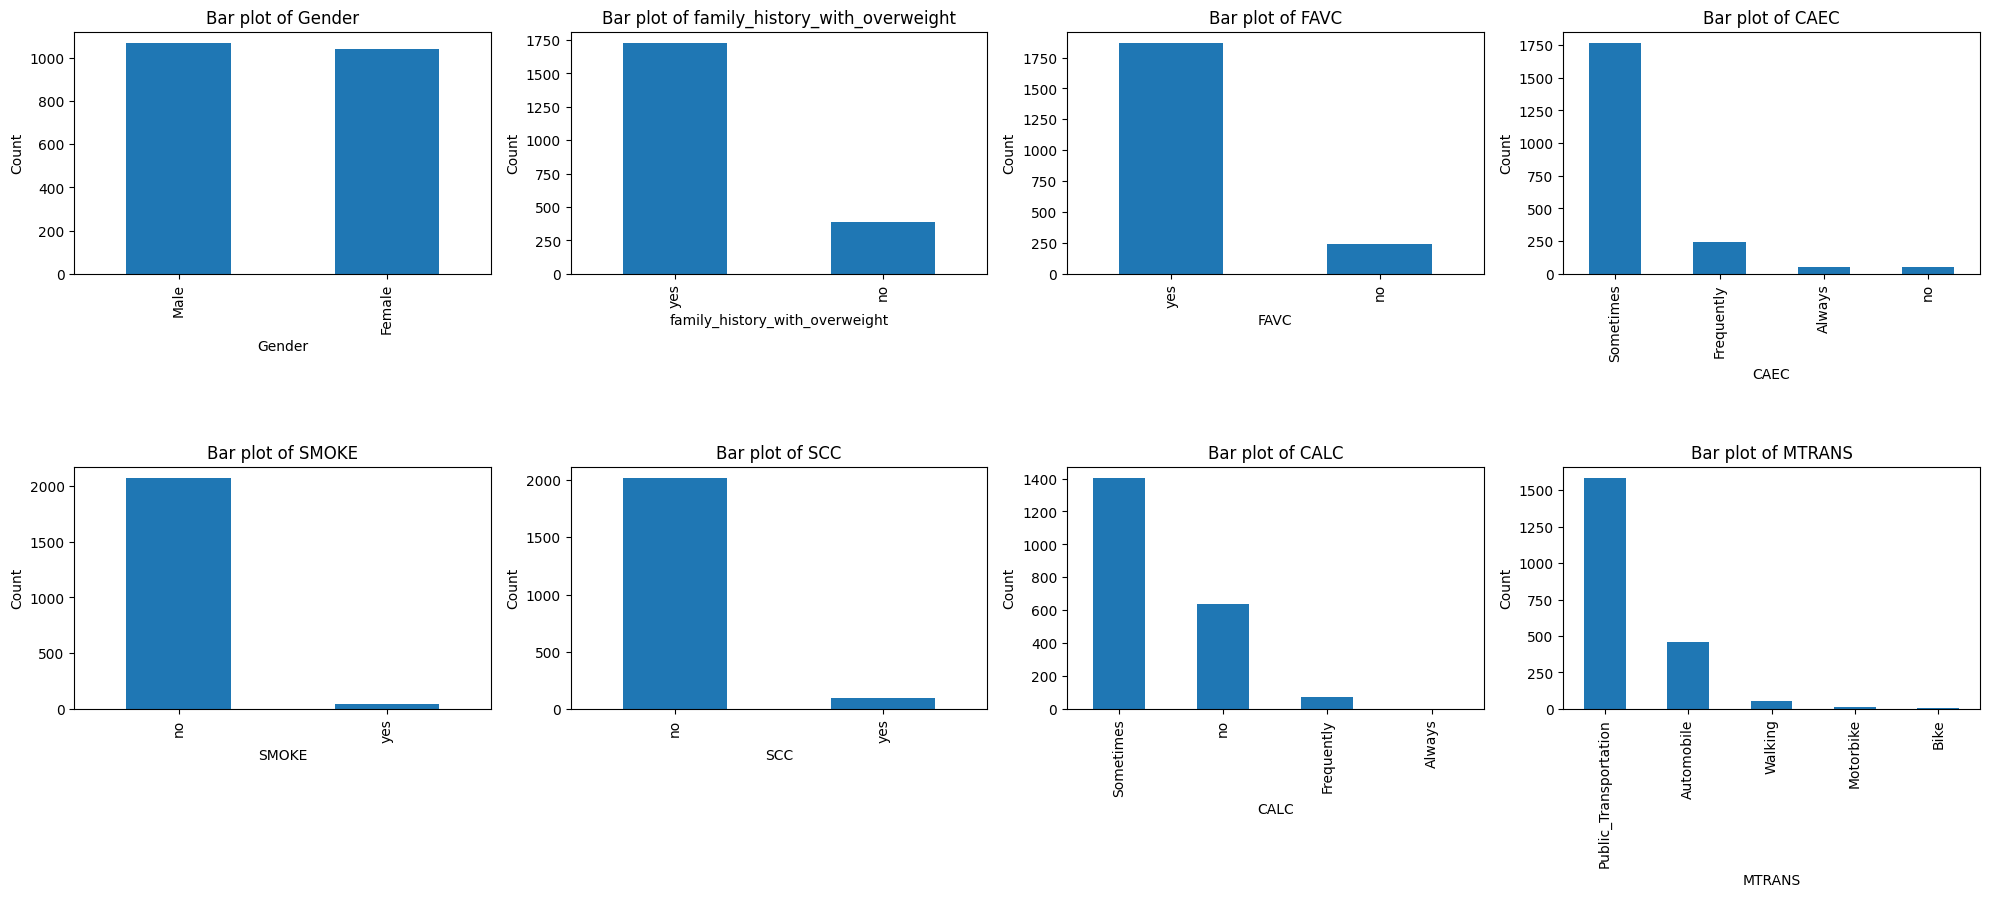

In [137]:
cat_data = Xcl.select_dtypes(include=['object'])

fig, axs = plt.subplots(4, 4, figsize=(20, 16))  # Increased figsize for better visibility
axs = axs.flatten()  # Flatten the 2D array of axes for easier iteration

# Loop through each column and corresponding subplot
for i, col in enumerate(cat_data.columns):
    ax = axs[i]
    cat_data[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Bar plot of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')


    # Hide any remaining empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [138]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_data.columns:
   Xcl[col] = le.fit_transform(Xcl[col])

In [29]:
ycl = le.fit_transform(ycl.ravel())

In [30]:
ycl

array([1, 1, 1, ..., 4, 4, 4])

In [139]:
Xcl.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3


In [12]:
xcl_int = Xcl.select_dtypes(include=['float64'])

In [17]:
from sklearn.cluster import KMeans

In [140]:
sum_of_squared_distances = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init='auto', init='k-means++', max_iter=1000).fit(Xcl)
    sum_of_squared_distances[k] = kmeans.inertia_

Text(0, 0.5, 'Sum of squared distances')

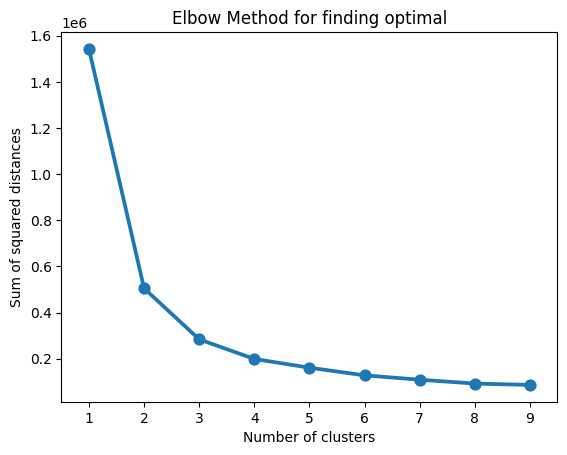

In [141]:
sns.pointplot(x=list(sum_of_squared_distances.keys()), y=list(sum_of_squared_distances.values()))
plt.title('Elbow Method for finding optimal')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')

In [159]:
kmeans = KMeans(n_clusters=2, n_init='auto', init='k-means++', max_iter=1000).fit(Xcl)

In [160]:
## cluster centers
cluster_centers = kmeans.cluster_centers_

In [161]:
pred_centroids = kmeans.predict(Xcl)
pred_centroids

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [162]:
xcl_cluster = Xcl.copy()
xcl_cluster['cluster'] = pred_centroids

In [163]:
xcl_cluster.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,cluster
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,1


In [164]:
colors = ['blue', 'red']
xcl_cluster['color'] = xcl_cluster['cluster'].map(lambda x: colors[x % len(colors)])

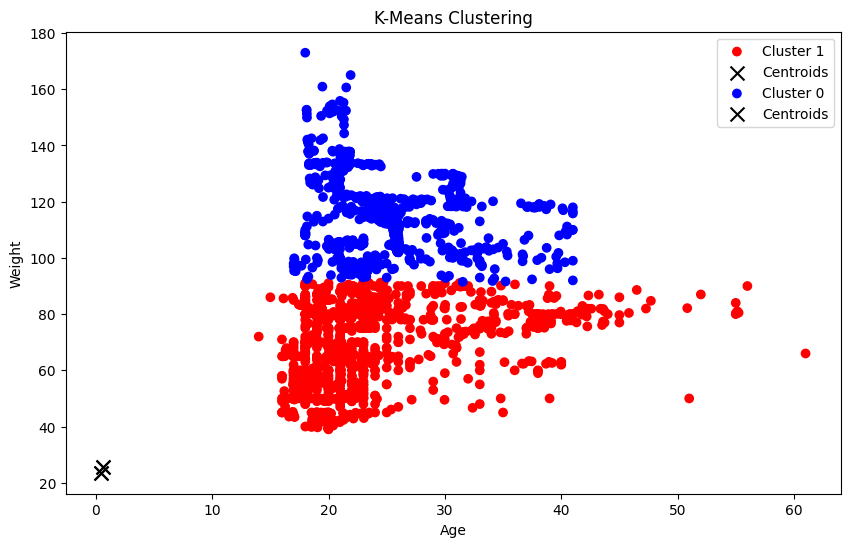

In [165]:
plt.figure(figsize=(10, 6))
for cluster in xcl_cluster['cluster'].unique():
    cluster_data = xcl_cluster[xcl_cluster['cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Weight'], c=cluster_data['color'], label=f'Cluster {cluster}')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=100, c='black', label='Centroids')
    plt.xlabel('Age')
    plt.ylabel('Weight')
    plt.title('K-Means Clustering')
    plt.legend()
plt.show()

In [166]:
# Evaluating clustering model
from sklearn.metrics import silhouette_score
silhouette = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init='auto', max_iter=1000).fit(Xcl)
    silhouette[k] = silhouette_score(xcl_int, kmeans.labels_)

Text(0, 0.5, 'Silhouette Score')

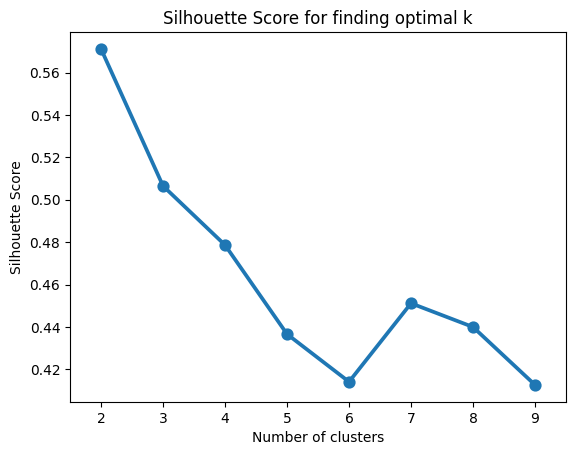

In [167]:
sns.pointplot(x=list(silhouette.keys()), y=list(silhouette.values()))
plt.title('Silhouette Score for finding optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

In [168]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(xcl_int, pred_centroids)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5711648160708832


In [1]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot